In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
daily_ngd = pd.read_csv('../data/daily_NGD.csv')

In [13]:
daily_ngd

,Date,Order,Year,Month,Day,NGD,LDZ,GTP,IND,HDD,...,DE wind,DE solar,THE price,DE IND index,EU storage,EU LNG,UK NL production,Norway sendout,African TAP,Is_Weekend_or_Holiday
0,2012/4/1,1,2012,4,1,260.429561,127.197376,7.236027,125.996159,16.265139,...,4869.3,NaN,24.300,96.900000,44.94,1463.5,NaN,NaN,36.2617,1
1,2012/4/2,2,2012,4,2,270.571811,133.410616,11.165036,125.996159,14.251594,...,1087.1,NaN,25.550,97.609071,44.98,1958.9,NaN,NaN,64.5416,0
2,2012/4/3,3,2012,4,3,259.802266,120.816753,12.989354,125.996159,11.845219,...,895.7,NaN,24.550,97.619969,45.07,2331.3,NaN,NaN,64.3773,0
3,2012/4/4,4,2012,4,4,252.343767,114.754796,11.592812,125.996159,12.582869,...,5783.3,NaN,24.800,97.630598,45.15,2258.8,NaN,NaN,63.0718,0
4,2012/4/5,5,2012,4,5,259.333501,118.820400,14.516942,125.996159,14.671116,...,2238.7,NaN,25.025,97.640958,45.25,2259.7,NaN,NaN,64.7125,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4134,2023/7/27,4135,2023,7,27,119.143265,24.443003,11.295230,83.405031,2.358150,...,14933.0,5200.1,28.400,95.476104,84.77,3281.0,103.175,298.0,98.9927,0
4135,2023/7/28,4136,2023,7,28,111.762820,20.187973,16.607405,74.967442,0.163656,...,4939.0,7237.5,25.600,95.447685,85.03,3274.7,115.187,293.3,95.6458,0
4136,2023/7/29,4137,2023,7,29,90.149818,18.373506,5.025861,66.750452,0.159912,...,8907.0,8194.2,25.600,95.419080,85.40,3235.9,122.815,294.2,94.5705,1
4137,2023/7/30,4138,2023,7,30,90.307291,18.579543,4.961970,66.765779,0.310793,...,21415.0,9177.1,25.600,95.390286,85.79,3091.4,112.772,289.4,90.6178,1


In [14]:
plot_pairs = {
    "NGD": ["HDD", "HDD-1", "Workday", "DE IND index", "EU storage", "EU LNG", "War", "Rus", "FR nuclear", "UK NL production", "Norway sendout", "African TAP", "DE wind", "DE solar", "THE price"],
    "LDZ": ["HDD", "HDD-1", "Workday"]
}

In [77]:
def plot_relationship(plot_pairs, data, n_cols=6):
    num_pairs = sum(len(plot_pairs[pair]) for pair in plot_pairs)
    num_rows = (num_pairs // n_cols) + 1 * (num_pairs % n_cols != 0)
    fig, ax = plt.subplots(num_rows, n_cols, figsize=(20, 10), sharex=False, sharey=False)
    plt.subplots_adjust(hspace=0.35, wspace=0.35)
    print(ax.shape)
    i = 0
    for pair in plot_pairs:
        for feature in plot_pairs[pair]:
            row = i // n_cols
            col = i % n_cols
            ax[row, col].scatter(data[feature], data[pair], s=10, marker='o', edgecolor='white', linewidth=0.2)
            ax[row, col].set_title(pair + " vs. " + feature)
            ax[row, col].set_ylabel(pair)
            ax[row, col].set_xlabel(feature)
            i += 1
    plt.show()

(3, 6)


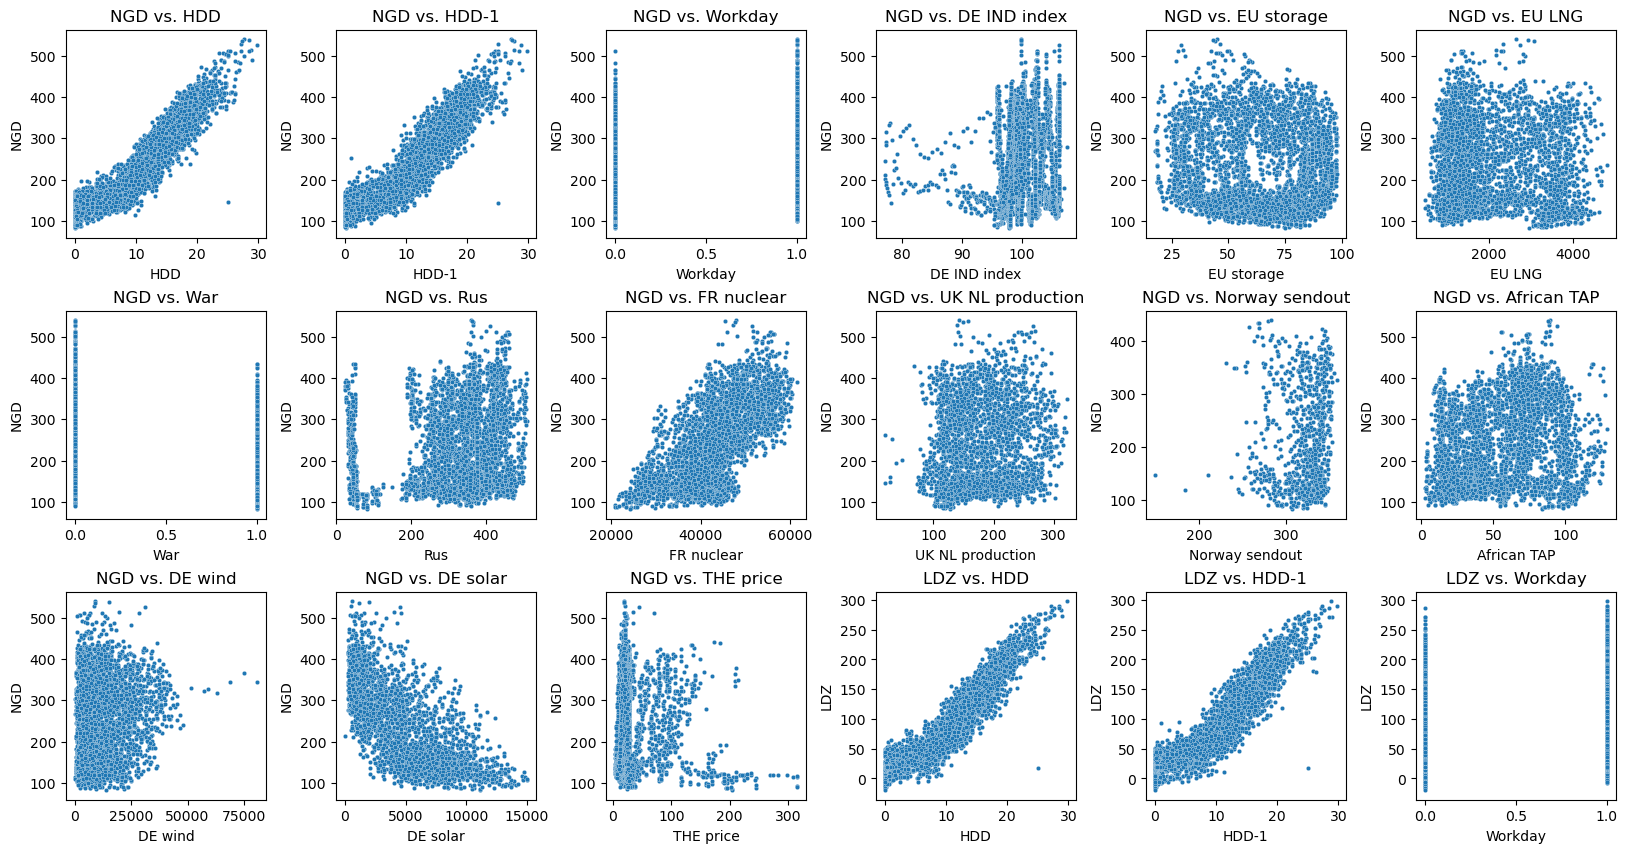

In [78]:
plot_relationship(plot_pairs, daily_ngd)